<a href="https://colab.research.google.com/github/HaTruong05/Dota-2-Esports/blob/main/Dota2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC-233: Data Analytics
## Ha Truong

## Final Project: Dota 2 Esports

## 1. Topic and Questions

My topic is Dota 2 Esports. Dota 2 is a popular multiplayer online battle arena video game. The game has an extremely active competitive scene with some of the highest prize pools offered in Esports and features multiple global scale tournaments throughout the year. As such, many professional players have earned a great deal from tournament prize pools alone, becoming young millionaires before the age of 30.

Using the readily available player and tournament data, I will attempt to answer the following questions and provide more insight into the Dota 2 Esports scene. The questions are:

1. How many people out of the top 1000 players (in terms of in-game ranked matchmaking rating) actually make it into the pro scene?
2. Out of the currently active professional players, how many are signed with a team?
3. While the top-performing players can earn a lot of prize money, does it hold up for the average professional player?
4. What region has won the most tier 1 tournaments?
5. What region has won the most prize money based on team earnings?
6. What region has won the most The Internationals?

In answering these questions, I hope to find the answer to two main questions:

1. How plausible is it to become a professional Dota 2 player and is it as appealing as most people think?
2. What region has the best Dota 2 competitive scene?

I also have some bonus questions that don't contribute to the other two main questions above that I still want to answer.

1. What region has won the most prize money based on individual earnings?
2. Does the pattern of tournament earnings I observe in question 3 occur in other Esports as well?


**NOTE**

1. The Dota 2 Esports scene is divided into 6 main regions: North America (NA), South America (SA), Europe (EU), China (CN), South East Asia (SEA), and Commonwealth of Independent States (CIS), which consists of mainly Russian players. Questions 4-6 are for determining which region out of the 6 listed here is the most accomplished in competitive Dota 2.

2. Dota 2 tournaments are divided into 4 tiers, from tier 1 to tier 4. Tier 1 tournaments are the most competitive, has the highest prize pools, and feature top teams from all around the world. Tier 2 tournaments are usually regional events or qualifiers for tier 1 events. Tier 3 tournaments are also regional events but have smaller prize pools. Tier 4 tournaments are small-scale events with the lowest prize pools. For my analysis, I will only use data from tier 1 tournaments as they are global-scaled events, and I want to know which region is the best when it comes to competitive Dota 2.

3. The International (TI) is the biggest, most prestigious Dota 2 event that happens once per year. Past TIs have featured prize pools in the millions, with the largest one having a prize pool of 40 million USD, setting the record for the largest prize pool of any single esports event.

## 2. Data
1. [Top player earnings](https://liquipedia.net/dota2/Portal:Statistics/Player_earnings)
2. [Top team earnings](https://liquipedia.net/dota2/Portal:Statistics/Team_earnings)
3. [In-game world leaderboards for each region](https://www.dota2.com/leaderboards)
4. [List of active players by region](https://liquipedia.net/dota2/Portal:Players)
5. [List of past tournaments and winners](https://liquipedia.net/dota2/Tier_4_Tournaments)
6. [List of countries by region](https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)
7. [Top player earnings for League of Legends](https://liquipedia.net/leagueoflegends/Portal:Statistics/Player_earnings)

Some of the data I listed I had to web scrape using Python 3.10, Selenium, and Beautiful Soup. The data is then recorded into CSV files and can be found on my [GitHub](https://github.com/HaTruong05/CSV_data/tree/main/Dota_2).

Most of my data comes from liquidpedia, a page that has information on popular games and professional players of those games. The list of countries by region is taken from Wikipedia, and the in-game world leaderboards are taken from the official Dota 2 webpage.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [ ]:
sns.set()

## 3. Analyzing

### Question 1: How many people out of the top 1000 players (in terms of in-game ranked matchmaking rating) actually make it into the pro scene?

In [ ]:
NA_players = pd.read_html("https://liquipedia.net/dota2/Portal:Players/Americas", header=1)[0]
row, col = NA_players.shape

print(f"NA_players has {row} rows and {col} columns")

NA_players has 76 rows and 5 columns


In [ ]:
SA_players = pd.read_html("https://liquipedia.net/dota2/Portal:Players/Americas", header=1)[1]
row, col = SA_players.shape

print(f"SA_players has {row} rows and {col} columns")

SA_players has 116 rows and 5 columns


In [ ]:
EU_players = pd.read_html("https://liquipedia.net/dota2/Portal:Players/Europe", header=1)[0]
row, col = EU_players.shape

print(f"EU_players has {row} rows and {col} columns")

EU_players has 172 rows and 5 columns


In [ ]:
CIS_players = pd.read_html("https://liquipedia.net/dota2/Portal:Players/Europe", header=1)[1]
row, col = CIS_players.shape

print(f"CIS_players has {row} rows and {col} columns")

CIS_players has 160 rows and 5 columns


In [ ]:
CN_players = pd.read_html("https://liquipedia.net/dota2/Portal:Players/China", header=1)[0]
row, col = CN_players.shape

print(f"CN_players has {row} rows and {col} columns")

CN_players has 155 rows and 5 columns


In [ ]:
SEA_players = pd.read_html("https://liquipedia.net/dota2/Portal:Players/Southeast_Asia", header=1)[0]
row, col = SEA_players.shape

print(f"SEA_players has {row} rows and {col} columns")

SEA_players has 210 rows and 5 columns


In [ ]:
# Combine active player data into one dataframe
active_players = pd.concat([NA_players, SA_players, CN_players, CIS_players, SEA_players, EU_players], ignore_index=True)

# Check its shape
row, col = active_players.shape
print(f"active_players has {row} rows and {col} columns")

active_players has 889 rows and 5 columns


In [ ]:
# Drop unecessary columns
active_players.drop(["Unnamed: 0", "Links", "Name"], axis=1, inplace=True)

In [ ]:
# Check its shape
row, col = active_players.shape
print(f"active_players has {row} rows and {col} columns")

active_players has 889 rows and 2 columns


In [ ]:
active_players.isnull().any()

ID      False
Team     True
dtype: bool

**NOTE**:

The "Team" column has a lot of missing data because not every active professional player on the list is signed with a team.

In [ ]:
leaderboard = pd.read_csv("https://raw.githubusercontent.com/HaTruong05/CSV_data/main/Dota_2/leaderboard.csv", names=["ID"])

row, col = leaderboard.shape
print(f"leaderboard has {row} rows and {col} columns")

leaderboard has 4000 rows and 1 columns


**NOTE**

The data frame leaderboard contains the in-game ID of the top 4000 players around the world. More specifically, it contains the top 1000 players for each of the following regions: Americas, Europe, China, and South East Asia.

Europe consists of EU and CIS players. Americas consists of NA and SA players. However, this doesn't really matter because a player is registered on the leaderboard of the region where they have the most games for the current season. A player is not registered on a server based on their current location or nationality.

I picked the top 1000 for each region because Dota 2 gives players in this range a special badge that distinguishes them from the rest of the player base.

In [ ]:
leaderboard.isnull().any()

ID    True
dtype: bool

In [ ]:
leaderboard.fillna("N/a", inplace=True)

**Note**

Fill missing values with "N/a." Missing values are the result of special characters in the in-game IDs listed on the leaderboard, which got lost during the web scraping process. Ex: S Ⱥ S ᵾ Ꝁ ɇ <. This shouldn't affect the analysis I'm about to do because I want to see if current active pro players appear in the top 1000 leaderboards for each region. Professional players' in-game ID are identical to their competing username, which never contains such special characters.



In [ ]:
# Check if an active pro player is in the top 1000 leaderboard
# 1 if True, 0 if False
top1000 = []
for ID in active_players["ID"]:
  val = 0
  for UID in leaderboard["ID"]:
    if ID in UID:
      val = 1
      continue
  top1000.append(val)

In [ ]:
top1000 = np.array(top1000)

In [ ]:
# Should have same number of values as number of active players
print(f"top 1000 has {len(top1000)} values")

top 1000 has 889 values


In [ ]:
# Add to the dataframe active_players
active_players["top1000"] = top1000

### Answer to question 1:

In [ ]:
pro_chance = active_players["top1000"].sum() / 4000 * 100
print("{:.2f}% of the top 4000 players are in the professional scene".format(pro_chance))

10.90% of the top 4000 players are in the professional scene



### Why is this interesting?
While there are many factors I haven't accounted for, such as not all of the top-ranking players are actively trying to break into the professional scene, or how professional players dedicate more time to practicing for tournaments in private lobbies than grinding for a spot on the leaderboards, the number still gives a glimpse of how hard is it to make it as a professional Dota 2 player.

These players dedicate much of their time to the game to reach a range where they can be scouted by Esports organizations. Yet, only 1 out of 10 make it. Furthermore, these are the best players in Dota. For an average person who wishes to become a professional Dota 2 player, the odds are much lower.

Data from the last 30 days show that the number of active players for Dota 2 peaked at 704,301. This means that if I were to pick a random player, their odds of entering the pro scene is less than 1%.  



### Question 2: Out of the currently active professional players, how many are signed with a team?

In [ ]:
signed = active_players["Team"].notnull().sum()

In [ ]:
signed_per = signed / len(active_players["Team"]) * 100

In [ ]:
print("{:.2f}% of active players are signed with a team".format(signed_per))

50.73% of active players are signed with a team


Even when someone has managed to break into the professional scene and enters a contract with an organization, it might not stay that way for long. Teams forming and quickly disbanding or players getting kicked for not performing well are common occurrences in Esports. The analysis above shows that only half of the current active players are signed with a team.

### Question 3: While the top-performing players can earn a lot of prize money, does it hold up for the average professional player?

In [ ]:
earnings1 = pd.read_html("https://liquipedia.net/dota2/Portal:Statistics/Player_earnings")[0]
earnings2 = pd.read_html("https://liquipedia.net/dota2/Special:Ask/-5B-5BConcept:Player-20earnings-5D-5D/-3FHas-20name/-3FHas-20nationality/-3FHas-20earnings/-3FHas-20id/mainlabel%3D/limit%3D500/order%3Ddesc/sort%3Dhas-20earnings/offset%3D500/format%3Dtemplate/link%3Dnone/searchlabel%3D...-20further-20results/default%3DNo-20more-20players-20with-20earnings/template%3DPortal-20statistics-20player-20earnings-20table-200-2D100-2Frow/introtemplate%3DPortal-20statistics-20player-20earnings-20table-2Fintro/outrotemplate%3DPortal-20statistics-20player-20earnings-20table-2Foutro")[0]
earnings3 = pd.read_html("https://liquipedia.net/dota2/index.php?title=Special:Ask&limit=500&offset=1000&q=%5B%5BConcept%3APlayer+earnings%5D%5D&p=mainlabel%3D%2Fformat%3Dtemplate%2Flink%3Dnone%2Fsearchlabel%3D...-20further-20results%2Fdefault%3DNo-20more-20players-20with-20earnings%2Ftemplate%3DPortal-20statistics-20player-20earnings-20table-200-2D100-2Frow%2Fintrotemplate%3DPortal-20statistics-20player-20earnings-20table-2Fintro%2Foutrotemplate%3DPortal-20statistics-20player-20earnings-20table-2Foutro&po=%3FHas+name%0A%3FHas+nationality%0A%3FHas+earnings%0A%3FHas+id%0A&sort=has+earnings&order=desc&eq=no#search")[0]

In [ ]:
# Combine 3 earnings tables into one
player_earnings = pd.concat([earnings1, earnings2, earnings3], ignore_index=True)

In [ ]:
# Should have 1368 rows and 8 columns
row, col = player_earnings.shape
print(f"player_earnings has {row} rows and {col} columns")

player_earnings has 1368 rows and 8 columns


In [ ]:
# Drop uneeded columns
player_earnings.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1, inplace=True)

In [ ]:
player_earnings.rename(columns={'Unnamed: 3':"1st_place", 'Unnamed: 4':"2nd_place", 'Unnamed: 5':"3rd_place"}, inplace=True)

In [ ]:
player_earnings.isnull().any()

ID           False
1st_place    False
2nd_place    False
3rd_place    False
Tier 1       False
Earnings     False
dtype: bool

In [ ]:
# Remove all non digit characters in earnings column with regex
player_earnings["Earnings"].replace('\D', '', regex=True, inplace=True)

In [ ]:
player_earnings["Earnings"] = player_earnings["Earnings"].astype(float)

In [ ]:
player_earnings["Earnings(mil)"] = player_earnings["Earnings"]/1000000

In [ ]:
# Find the percentage of players with over $1 million in tournament earnings
top_earnings = player_earnings["Earnings(mil)"] > 1
top_earners = player_earnings[top_earnings]
top_earners_per = len(top_earners) / row * 100

print("{:.2f}% of players have earned more than $1 million dollars".format(top_earners_per))

6.14% of players have earned more than $1 million dollars


In [ ]:
# Find the percentage of players with less than $100,000 in tournament earnings
low_earnings = player_earnings["Earnings(mil)"] < 0.1
low_earners = player_earnings[low_earnings]

low_earners_per = len(low_earners) / row *100

print("{:.2f}% of players have earned less than 10,000 dollars".format(low_earners_per))

77.92% of players have earned less than 10,000 dollars


In [ ]:
top_earnings_per = top_earners["Earnings"].sum() / player_earnings["Earnings"].sum() * 100

print("{:.2f}% of tournament earnings goes to the top {:.2f}% of players".format(top_earnings_per, top_earners_per))

68.13% of tournament earnings goes to the top 6.14% of players


In [ ]:
low_earnings_per = low_earners["Earnings"].sum() / player_earnings["Earnings"].sum() * 100

print("{:.2f}% of tournament earnings goes to the top {:.2f}% of players".format(low_earnings_per, low_earners_per))

6.56% of tournament earnings goes to the top 77.92% of players


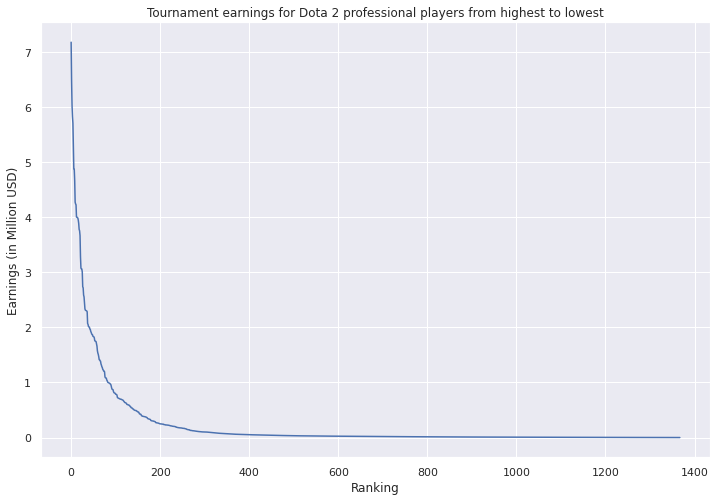

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

x = player_earnings.index
y = player_earnings["Earnings(mil)"]

plt.xlabel("Ranking")
plt.ylabel("Earnings (in Million USD)")
plt.title("Tournament earnings for Dota 2 professional players from highest to lowest")

ax.plot(x, y)

plt.show()

The graph above shows us the cruel reality of being a professional Dota player. While the millions of dollars of prize money are undoubtedly attractive, it's all funneled into the pockets of the selected few at the top of the scene, shown clearly by the abrupt drop in the graph around the top 100th earner.

Only 6.14% of the players have earned more than 1 million dollars in prize money, and their earnings account for 68.13% of all players' tournament earnings. The majority of players (77.92%) have earned less than 100,000 dollars throughout their whole career, and their earnings only make up 6.56% of all players' tournament earnings.

This is because prize pools of millions of dollars are only awarded at global scale tournaments (tier 1 tournaments) where only the best of the best can participate. For regional and local tournaments (tier 2 to tier 4 tournaments), the prize pool is much lower.


### Conclusion 1

Using the results of the three analyses above, we can conclude that it's extremely difficult to become a professional Dota 2 player, and it isn’t as appealing as most people might think. While the biggest events award the winners with millions of dollars, most professional Dota 2 players never even come close to earning that much.

### Question 4: What region has won the most tier 1 tournaments?

In [ ]:
# Contains tournament names and winners
tour_results = pd.read_csv("https://raw.githubusercontent.com/HaTruong05/CSV_data/main/Dota_2/tournament_data.csv", names=["Tournament", "Winner", "Runner-up"])

In [ ]:
row, col = tour_results.shape
print(f"tour_results have {row} rows and {col} columns")

tour_results have 175 rows and 3 columns


In [ ]:
tour_results.isnull().any()

Tournament    False
Winner        False
Runner-up     False
dtype: bool

In [ ]:
# Contains team name and what region the team is in
teams = pd.read_csv("https://raw.githubusercontent.com/HaTruong05/CSV_data/main/Dota_2/teams.csv", names=["Team", "Region"], keep_default_na=False)

In [ ]:
teams.isnull().any()

Team      False
Region    False
dtype: bool

In [ ]:
# Merge 2 dataframes to get the region of the winning teams
tour_results = pd.merge(tour_results, teams, how="left", left_on="Winner", right_on="Team")

In [ ]:
tour_results.drop("Team", axis=1, inplace=True)

In [ ]:
tour_results.rename(columns={"Region":"Winner_region"}, inplace=True)

In [ ]:
row, col = tour_results.shape
print(f"tour_results have {row} rows and {col} columns")

tour_results have 175 rows and 4 columns


In [ ]:
tour_results.isnull().any()

Tournament       False
Winner           False
Runner-up        False
Winner_region    False
dtype: bool

In [ ]:
winner_count = tour_results.groupby("Winner_region").count()["Winner"]

In [ ]:
print("Tournaments won by region:\n")
winner_count

Tournaments won by region:



Winner_region
CIS    49
CN     50
EU     49
NA      3
SA     12
SEA    12
Name: Winner, dtype: int64

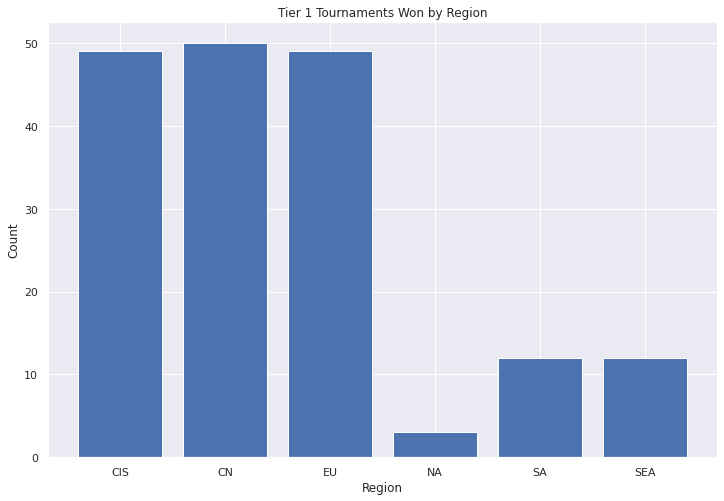

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

x = winner_count.index
y = winner_count

plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Tier 1 Tournaments Won by Region")

ax.bar(x, y)

plt.show()

China has won the most tier 1 tournaments by far, with CIS and Europe tying for second closely behind. South America and South East Asia tie for third place, with 12 tier 1 events won each, and North America is last, coming first for only a total of 3 times.

While it's true that China is in first, the results are a bit too close for us to declare a clear winner. As such, I will also take a look at the number of times each region has finished in second place.

In [ ]:
# Merge 2 dataframes to get the region of the teams finishing second
tour_results = pd.merge(tour_results, teams, how="left", left_on="Runner-up", right_on="Team")

In [ ]:
tour_results.drop("Team", axis=1, inplace=True)

In [ ]:
tour_results.rename(columns={"Region":"Runner-up_region"}, inplace=True)

In [ ]:
row, col = tour_results.shape
print(f"tour_results have {row} rows and {col} columns")

tour_results have 175 rows and 5 columns


In [ ]:
tour_results.isnull().any()

Tournament          False
Winner              False
Runner-up           False
Winner_region       False
Runner-up_region    False
dtype: bool

In [ ]:
runner_up = tour_results.groupby("Runner-up_region").count()["Runner-up"]

In [ ]:
print("Getting second place in tournaments by region:\n")
runner_up

Getting second place in tournaments by region:



Runner-up_region
CIS    35
CN     46
EU     42
NA     19
SA     20
SEA    13
Name: Runner-up, dtype: int64

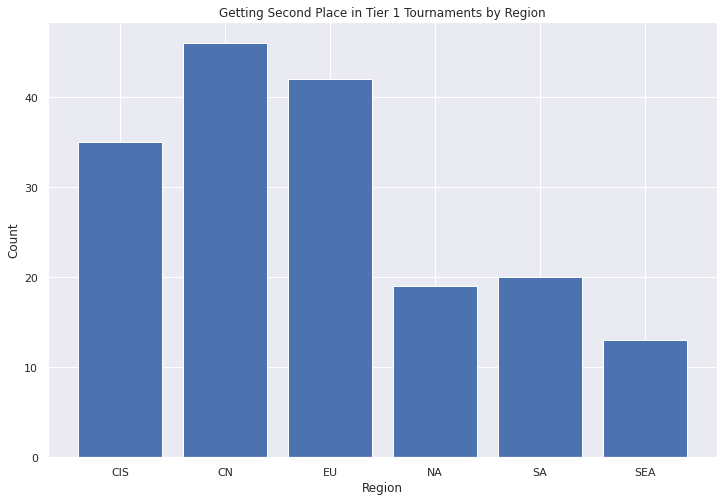

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

x = runner_up.index
y = runner_up

plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Getting Second Place in Tier 1 Tournaments by Region")

ax.bar(x, y)

plt.show()

Once again, China is in first place, followed closely by Europe, and then CIS. Interestingly, while North America hasn't won many tier 1 tournaments, the region has come second a considerable amount of times, ranking 5th overall. South America is in 4th place, and South East Asia is last.

From the analysis above, China is undisputedly first when it comes to performing well in tournaments, with Europe closely behind, and CIS in third place. While South America and South East Asia tie for the number of tournaments won, I will give South America 4th place since the region has finished second more times than SEA has. North America is a bit of an outlier but I will place the region behind SEA since NA's number of tournaments won is much lower than SEA's.

### Question 5: What region has won the most prize money based on team earnings?

In [ ]:
team1 = pd.read_html("https://liquipedia.net/dota2/Portal:Statistics/Team_earnings")[0]
team2 = pd.read_html("https://liquipedia.net/dota2/Special:Ask/-5B-5BConcept:Team-20earnings-5D-5D-20-5B-5BIs-20national-20team::false-5D-5D/-3FHas-20name/-3FHas-20earnings/-3FHas-20id/mainlabel%3D/limit%3D500/order%3Ddesc/sort%3Dhas-20earnings/offset%3D500/format%3Dtemplate/link%3Dnone/searchlabel%3D...-20further-20results/default%3DNo-20more-20teams-20with-20earnings/template%3DPortal-20statistics-20team-20earnings-20table-200-2D100-2Frow/introtemplate%3DPortal-20statistics-20team-20earnings-20table-2Fintro/outrotemplate%3DPortal-20statistics-20team-20earnings-20table-2Foutro")[0]

In [ ]:
# Combine 2 team earning tables into one
team_earnings = pd.concat([team1, team2], ignore_index=True)

In [ ]:
row, col = team_earnings.shape
print(f"team_earnings has {row} rows and {col} columns")

team_earnings has 646 rows and 7 columns


In [ ]:
team_earnings.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
team_earnings.rename(columns={'Organization':'Team','Unnamed: 2':"1st_place", 'Unnamed: 3':"2nd_place", 'Unnamed: 4':"3rd_place"}, inplace=True)

In [ ]:
# Remove all non digit characters in earnings column with regex
team_earnings["Earnings"].replace('\D', '', regex=True, inplace=True)

In [ ]:
team_earnings["Earnings"] = team_earnings["Earnings"].astype(float)

In [ ]:
team_earnings.isnull().any()

Team         False
1st_place    False
2nd_place    False
3rd_place    False
Tier 1       False
Earnings     False
dtype: bool

In [ ]:
team_earnings.dtypes

Team          object
1st_place      int64
2nd_place      int64
3rd_place      int64
Tier 1         int64
Earnings     float64
dtype: object

In [ ]:
# Merge data to get the region of each team
team_earnings = pd.merge(team_earnings, teams, how="left")

In [ ]:
team_earnings.set_index("Team", inplace=True)

In [ ]:
# Drop a team that doesn't belong to any regions
team_earnings.drop("Vivacity E-Sports", inplace=True)

**NOTE**

For this section, there's earnings data from teams based in Africa. African teams didn't show up in the previous section because no Africa-based organizations have made it to Tier 1 tournaments yet. Furthermore, Africa is not included in the 6 main regions for competitive Dota 2.

As such, I have decided to drop the African teams since they don't contribute to my analysis of the 6 main regions.

In [ ]:
# Drop teams that are based in Africa
Africa_teams = team_earnings[team_earnings["Region"]=="Africa"]
team_earnings.drop(Africa_teams.index, inplace=True)

In [ ]:
row, col = team_earnings.shape
print(f"team_earnings has {row} rows and {col} columns")

team_earnings has 643 rows and 6 columns


In [ ]:
region_team_earnings = team_earnings.groupby("Region").sum()["Earnings"]

In [ ]:
print("Total earnings by region using team data: \n")
region_team_earnings

Total earnings by region using team data: 



Region
CIS     44733421.0
CN      92085122.0
EU     102402218.0
NA      15582065.0
SA      29472882.0
SEA     25244653.0
Name: Earnings, dtype: float64

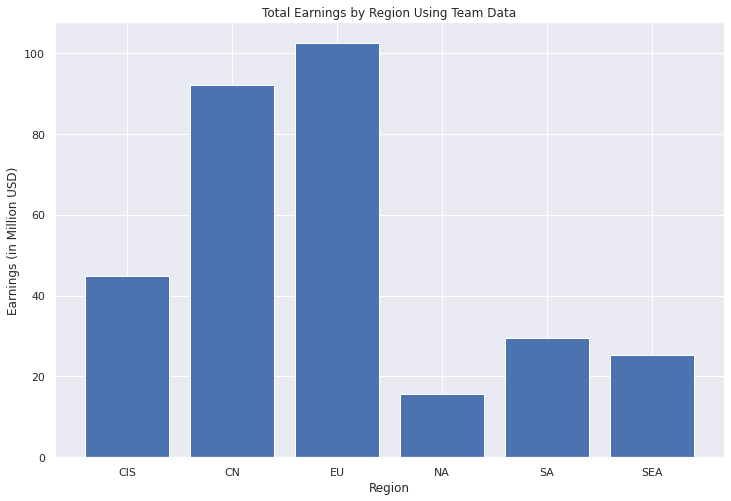

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

x = region_team_earnings.index
y = region_team_earnings / 1000000

plt.xlabel("Region")
plt.ylabel("Earnings (in Million USD)")
plt.title("Total Earnings by Region Using Team Data")

ax.bar(x, y)

plt.show()

Knowing the regions' ranking when it comes to winning and performing well in tournaments. The results for CIS, North America, South America, and South East Asia here aren't surprising.

However, While China undisputedly comes first in the previous section, Europe beats China by a wide margin when it comes to prize pool earnings. Why is this the case? To answer this question, we need to investigate which region has won the most The Internationals, an annual tier 1 event that features the largest prize pools in any Esports.



### Question 6: What region has won the most The Internationals?

In [ ]:
# Extract data of TIs into a new data frame
TI = tour_results[tour_results["Tournament"].str.contains("The International")].copy()

In [ ]:
TI_winner = TI.groupby("Winner_region").count()["Winner"]

In [ ]:
print("Number of The Internationals won by region: \n")
TI_winner

Number of The Internationals won by region: 



Winner_region
CIS    2
CN     3
EU     5
SA     1
Name: Winner, dtype: int64

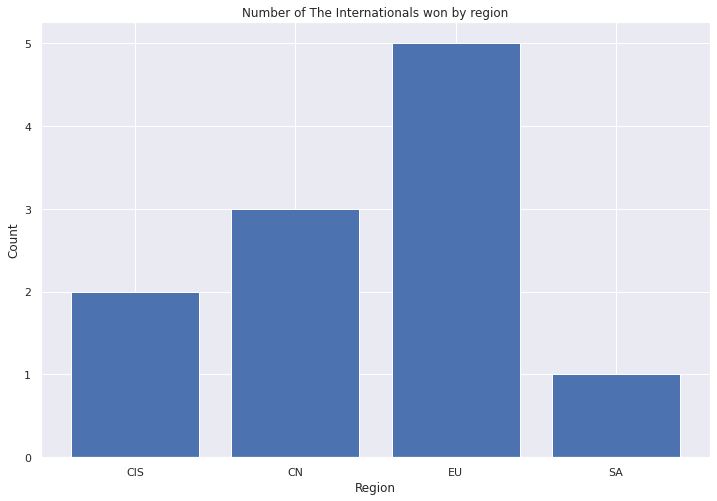

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

x = TI_winner.index
y = TI_winner

plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Number of The Internationals won by region")

ax.bar(x, y)

plt.show()

In [ ]:
# Add column year to TI data
year = np.append(np.arange(2011, 2020), [2021,2022])
year = np.flip(year)
TI["Year"] = year

In [ ]:
# Add column prize to TI data (contains prize pool for each TI)
prize = [18930775, 40018195, 34330068, 25532177, 24787916, 20770460, 18429613, 10923977, 2874380, 1600000, 1600000]
TI["Prize"] = prize

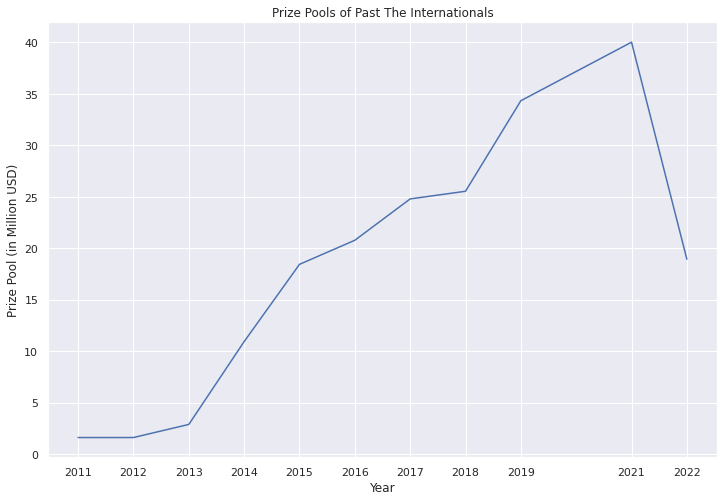

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

x = TI["Year"]
y = TI["Prize"] / 1000000

plt.xlabel("Year")
plt.ylabel("Prize Pool (in Million USD)")
plt.title("Prize Pools of Past The Internationals")

plt.xticks(x)

ax.plot(x, y)

plt.show()

**NOTE**

There is a gap between 2019 and 2021 because The International was canceled in 2020 due to COVID.

In [ ]:
print("The winning region of past TIs:\n")
TI[["Tournament", "Winner_region"]]

The winning region of past TIs:



,Tournament,Winner_region
1,The International 2022,EU
7,The International 2021,CIS
19,The International 2019,EU
26,The International 2018,EU
38,The International 2017,EU
58,The International 2016,CN
79,The International 2015,SA
107,The International 2014,CN
135,The International 2013,EU
163,The International 2012,CN


Not only has Europe won the most The Internationals, but the region has also won the most recent ones. Since the prize pool increase yearly, except for 2022, it makes sense that Europe is in first place in terms of tournament earnings.




### Conclusion 2
From the above analyses, China and Europe currently tie for the best region in competitive Dota 2. China is the best when it comes to winning tournaments while Europe wins in terms of tournament earnings.

Since winning The International is often regarded by professional players as a lifetime achievement, I will use the 2 regions' performance in past The Internationals as the tiebreaker. Since Europe has won the most The Internationals and is also the winner of 4 out of the 5 most recent TIs, it's reasonable to say that Europe is the best region when it comes to competitive Dota 2.


### Bonus Question 1: What region has won the most prize money based on individual earnings?

This section will be different. Dota 2 doesn't have specific guidelines on what countries belong to what region. For example, it's unclear where Australia or Middle Eastern countries belong regarding the 6 main regions used by competitive Dota (NA, SA, EU, CIS, SEA, and CN). As such, it's not possible to group players based on these main regions using their nationalities. Instead, players' earnings will be grouped using [the UN's list of countries in each region](https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations).

Even though this question doesn't help answer my two main questions, it's still interesting because usually, teams don't consist of only players from the same region. For example, an organization based in Europe can recruit players from Asia. As such, by analyzing individual earnings, I can see if Europe (EU and CIS) and Asia (China and SEA) would still be in the top 2 when it comes to tournament earnings, or do organizations in these regions outsource talents from other regions.


In [ ]:
# Get the list of each player's nationality
countries = pd.read_csv("https://raw.githubusercontent.com/HaTruong05/CSV_data/main/Dota_2/flags.csv", names=["Country"])

In [ ]:
countries["Country"] = countries["Country"].replace("Non-representing", "Russia")

**NOTE**

Due to the Russian invasion of Ukraine, several Russian players have asked Liquidpedia (my data source) to represent them as countryless. For the sake of my analysis, I will still count them as players from Russia.

In [ ]:
# Add column containing nationality data to player_earnings
player_earnings["Country"] = countries["Country"]

In [ ]:
row, col = player_earnings.shape
print(f"player_earnings has {row} rows and {col} columns")

player_earnings has 1368 rows and 8 columns


In [ ]:
player_earnings.isnull().any()

ID               False
1st_place        False
2nd_place        False
3rd_place        False
Tier 1           False
Earnings         False
Earnings(mil)    False
Country          False
dtype: bool

In [ ]:
# Remove superscripts in the data using beautiful soup
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'

soup = BeautifulSoup(requests.get(url).content, 'html.parser')

# remove supercripts
for sup in soup.select('sup'):
    sup.extract()

regions = pd.read_html(str(soup))[0]

In [ ]:
# Drop unused column
regions.drop(["UN statisticalsubregion", 'Population(1 July 2022)', 'Population(1 July 2023)', 'Change'], axis=1, inplace=True)

In [ ]:
regions.rename(columns={'Country / Area': 'Country', 'UN continentalregion':'Region'}, inplace=True)

In [ ]:
# Rename an entry so it matches the data in player_earnings
regions["Country"] = regions["Country"].replace("Czechia", "Czech Republic")

In [ ]:
# Replace Macau with China because Macau is technically part of China
player_earnings["Country"] = player_earnings["Country"].replace("Macau", "China")

In [ ]:
# Get the region of each player by merging 2 database
player_earnings = pd.merge(player_earnings, regions, how="left")

In [ ]:
row, col = player_earnings.shape
print(f"player_earnings has {row} rows and {col} columns")

player_earnings has 1368 rows and 9 columns


In [ ]:
player_earnings.isnull().any()

ID               False
1st_place        False
2nd_place        False
3rd_place        False
Tier 1           False
Earnings         False
Earnings(mil)    False
Country          False
Region           False
dtype: bool

In [ ]:
region_indiv_earnings = player_earnings.groupby("Region").sum()["Earnings"]

In [ ]:
print("Total earnings by region using individual players' data: \n")
region_indiv_earnings

Total earnings by region using individual players' data: 



Region
Africa          30910.0
Americas     33452829.0
Asia        139474942.0
Europe      132466914.0
Oceania       8078552.0
Name: Earnings, dtype: float64

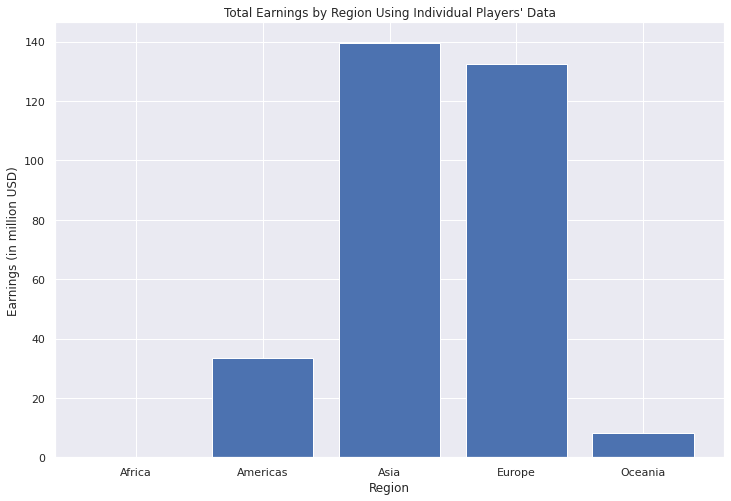

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

x = region_indiv_earnings.index
y = region_indiv_earnings / 1000000

plt.xlabel("Region")
plt.ylabel("Earnings (in million USD)")
plt.title("Total Earnings by Region Using Individual Players' Data")

ax.bar(x, y)

plt.show()

When it comes to individual tournament earnings, Asia and Europe, which represent South East Asian, Chinese, CIS, and European players remain at the top. This confirms that the regions that are most successful in competitive Dota also have the best talents. Organizations do little to no outsourcing when it comes to recruiting their players.


### Bonus Question 2: Does the pattern of tournament earnings I observe in question 3 occur in other Esports as well?

For this section, I will compare the tournament earnings from highest to lowest of Dota 2 professional players to League of Legends professional players to see if the same trend occurs. League of Legends is another extremely popular multiplayer online battle arena video game with an active Esports scene. The game shares many similarities with Dota 2 in terms of playstyles and objectives.


In [ ]:
lol1 = pd.read_html("https://liquipedia.net/leagueoflegends/Portal:Statistics/Player_earnings")[0]
lol2 = pd.read_html("https://liquipedia.net/leagueoflegends/Special:Ask/-5B-5BConcept:Player-20earnings-5D-5D/-3FHas-20nationality/-3FHas-20earnings/-3FHas-20id/mainlabel%3D/limit%3D500/order%3Ddesc/sort%3Dhas-20earnings/offset%3D500/format%3Dtemplate/link%3Dnone/searchlabel%3D...-20further-20results/default%3DNo-20more-20players-20with-20earnings/template%3DPortal-20statistics-20player-20earnings-20table-2Ftotal-2Frow/userparam%3D/introtemplate%3DPortal-20statistics-20player-20earnings-20table-2Fintro/outrotemplate%3DPortal-20statistics-20player-20earnings-20table-2Foutro")[0]
lol3 = pd.read_html("https://liquipedia.net/leagueoflegends/index.php?title=Special:Ask&limit=500&offset=1000&q=%5B%5BConcept%3APlayer+earnings%5D%5D&p=mainlabel%3D%2Fformat%3Dtemplate%2Flink%3Dnone%2Fsearchlabel%3D...-20further-20results%2Fdefault%3DNo-20more-20players-20with-20earnings%2Ftemplate%3DPortal-20statistics-20player-20earnings-20table-2Ftotal-2Frow%2Fuserparam%3D%2Fintrotemplate%3DPortal-20statistics-20player-20earnings-20table-2Fintro%2Foutrotemplate%3DPortal-20statistics-20player-20earnings-20table-2Foutro&po=%3FHas+nationality%0A%3FHas+earnings%0A%3FHas+id%0A&sort=has+earnings&order=desc&eq=no#search")[0]

In [ ]:
# Combine 3 earnings data frames into one
lol_earnings = pd.concat([lol1, lol2, lol3], ignore_index=True)

In [ ]:
row, col = lol_earnings.shape
print(f"lol_earnings has {row} rows and {col} columns")

lol_earnings has 1500 rows and 8 columns


In [ ]:
# We only care about column earnings
lol_earnings.isnull().any()

Unnamed: 0    False
Unnamed: 1     True
ID            False
Unnamed: 3    False
Unnamed: 4    False
Unnamed: 5    False
S-Tier        False
Earnings      False
dtype: bool

In [ ]:
# Remove all non digit characters in earnings column with regex
lol_earnings["Earnings"].replace('\D', '', regex=True, inplace=True)

# Change data type of column earnings to type float
lol_earnings["Earnings"] = lol_earnings["Earnings"].astype(float)

In [ ]:
# Cut the data frame down to 1368 entries so it matches the length of the Dota data frame
lol_earnings = lol_earnings[:1368]
row, col = lol_earnings.shape
print(f"lol_earnings has {row} rows and {col} columns")

lol_earnings has 1368 rows and 8 columns


Text(0.09, 0.5, 'Earnings (in Million USD)')

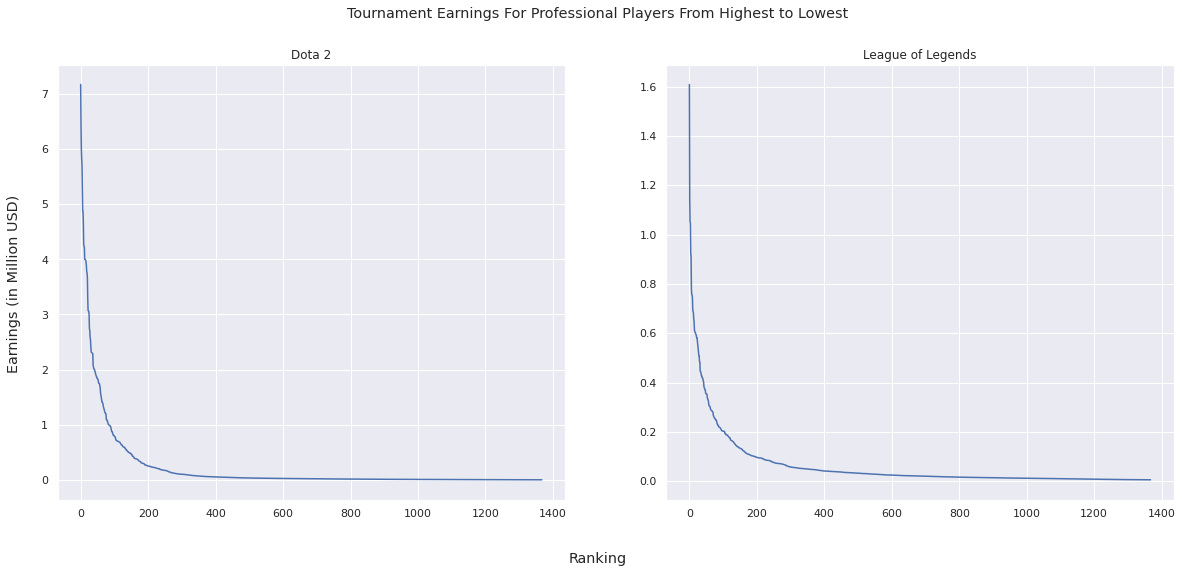

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(20,8)

ax1.plot(player_earnings.index, player_earnings['Earnings(mil)'])
ax2.plot(lol_earnings.index, lol_earnings["Earnings"] / 1000000)

ax1.set_title("Dota 2")
ax2.set_title("League of Legends")

fig.suptitle("Tournament Earnings For Professional Players From Highest to Lowest")
fig.supxlabel("Ranking")
fig.supylabel("Earnings (in Million USD)", x = 0.09)


While the tournament earnings of professional players from the 2 games are not in the same range, it's interesting how the graph looks almost identical. Both graphs experience an abrupt drop around the top 100th earner. From this, we can conclude that, for the multiplayer online battle arena genre, all the money from the competitive scene goes to the top players, while the average professional player earns very little in terms of tournament earnings.

## 4. Ethics Implications

Since some of the data is not in table formatting, I had to web scrape them using Selenium, and I'm uncertain about the legality of scraping online data.

For the analysis I did in question 1, I assigned the Russian flags to players born in Russia even though they don't want to be represented by the Russian flag. I also represented a player from Macau in the list as a Chinese player, even though Macau's a special administrative region without getting permission from the player.

## 5. What I might explore next

If I have the available data, I would like to use machine learning to predict which team is gonna win the next “The International.” To do this, I would need data on past teams that have won past TIs. I would need to track the performance of each player in those teams leading up to past TIs and compare it with the performance of current professional players leading up to the next TI.

Even if I have access to all this Data, I'm not sure if it would be possible to train a machine-learning model because there have only been 11 TIs. This might be too small of a data pool for generating a good prediction.